In [1]:
filename = "datasets-uci-iris.csv"
column_names_list = ['sepal_length','sepal_width','petal_length','petal_width','target']

import numpy as np
import pandas as pd

treino = pd.read_csv( filename, header=None, sep = ',', names = column_names_list ) 

In [ ]:
treino.head()

In [ ]:
treino.shape

In [ ]:
treino.columns

In [ ]:
type(treino.target[0])

In [2]:
import matplotlib.pyplot as plt
colors = []
setosa = []
versicolor = []
virginica = []
for i in treino.target:
    if i.find('setosa') != -1:
        colors.append(0)
        setosa.append(1)
        versicolor.append(0)
        virginica.append(0)
    elif i.find('versicolor') != -1:
        colors.append(1)
        setosa.append(0)
        versicolor.append(1)
        virginica.append(0)
    elif i.find('virginica') != -1:
        colors.append(2)
        setosa.append(0)
        versicolor.append(0)
        virginica.append(1)
colors

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 2]

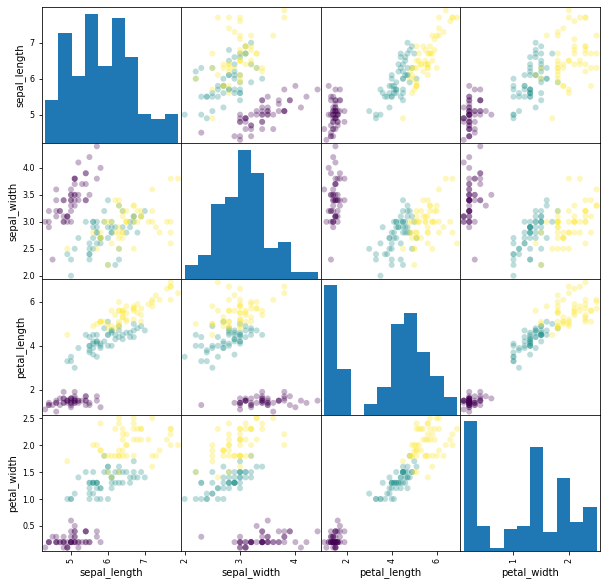

In [3]:
# Esta é uma parte apenas para visualização dos dados
# O script funciona sem esta parte

dados = treino.loc[:,treino.columns != 'target']
scatterplot = pd.plotting.scatter_matrix(dados, alpha=0.3, figsize=(10,10), diagonal='hist', c=colors, marker='o',grid=True)
plt.show()

In [5]:
# Cria os conjuntos de treino e testes, a partir da massa de dados que temos
from sklearn.model_selection import train_test_split

y = np.array(colors)

X_train, X_test, y_train, y_test = train_test_split(dados,y,random_state=41,test_size=.2)

# Transforma o vetor y no y_, uma estrutura mais apropriada ao SVM
from sklearn import svm

from sklearn import preprocessing 

Norm_X_train = preprocessing.normalize(X_train)
Norm_X_test = preprocessing.normalize(X_test)

# Como rodar independentemente do algoritmo que procura otimizar parâmetros
sm = svm.SVC(kernel='rbf', C=1).fit(Norm_X_train,y_train)          

y_pred = sm.predict(Norm_X_test)

print(sm.score(Norm_X_test,y_pred))

from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred, average=None)
recall = metrics.recall_score(y_test, y_pred, average=None)

print("Accuracy:", accuracy, " Precision:", precision, " Recall:", recall)

1.0
Accuracy: 0.9666666666666667  Precision: [1.         1.         0.90909091]  Recall: [1.         0.90909091 1.        ]
